In [11]:
import pandas as pd
import glob 
import matplotlib.pyplot as plt
import numpy as np
  
raw_data_path = '../data/raw'
file_list = glob.glob(raw_data_path + "/*.csv")

In [12]:
file_list

['../data/raw\\1-2-3-room_2025-05-05_19-58.csv']

In [18]:
main_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   author               1689 non-null   object 
 1   author_type          1689 non-null   object 
 2   url                  1689 non-null   object 
 3   location             1689 non-null   object 
 4   deal_type            1689 non-null   object 
 5   accommodation_type   1689 non-null   object 
 6   floor                1689 non-null   int64  
 7   floors_count         1689 non-null   int64  
 8   rooms_count          1689 non-null   int64  
 9   total_meters         1689 non-null   float64
 10  price_per_month      1689 non-null   int64  
 11  commissions          1689 non-null   int64  
 12  price                1689 non-null   int64  
 13  district             1559 non-null   object 
 14  street               1665 non-null   object 
 15  house_number         1680 non-null   o

In [19]:
main_dataframe = pd.read_csv(file_list[0])
for i in range(1, len(file_list)): 
    data = pd.read_csv(file_list[i]) 
    df = pd.DataFrame(data) 
    main_dataframe = pd.concat([main_dataframe, df], axis=0)

In [20]:
main_dataframe['url_id'] = main_dataframe['url'].map(lambda x: x.split('/')[-2])
new_dataframe = main_dataframe[['url_id', 'total_meters', 'price']].set_index('url_id')

<Axes: >

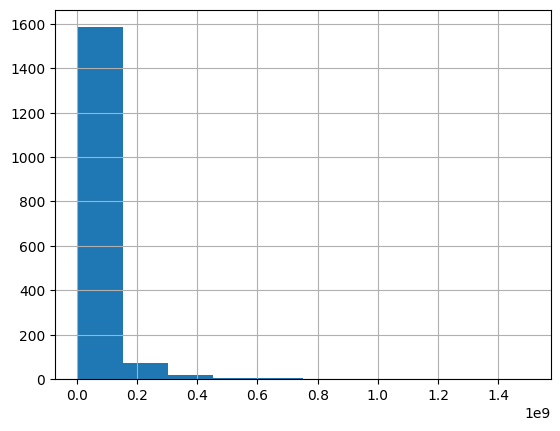

In [21]:
new_dataframe['price'].hist()

In [22]:
new_df = new_dataframe[new_dataframe['price'] < 100_000_000]

In [23]:
new_df

,total_meters,price
url_id,,
315747133,32.0,13590000
314702076,41.0,22600000
315253252,79.0,75000000
313640113,40.1,35500000
286050252,42.5,7150000
...,...,...
309347303,90.1,67400000
314669483,117.0,65000000
314118729,130.0,61900000


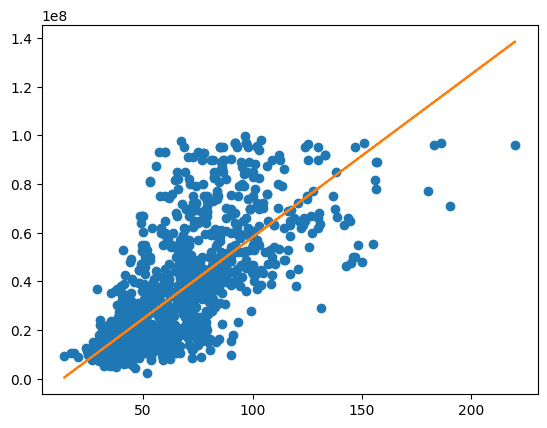

In [24]:
x = new_df['total_meters']
y = new_df['price']

plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)